

```
# This is formatted as code
```

# Enterprise GenAI Adoption & Workforce Impact Data

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
Ai = pd.read_csv("/content/Enterprise_GenAI_Adoption_Impact.csv")

## Data Set
###columns = [
  "Company Name"-[Anonymized name]

  "Industry"-[Sector (e.g., Finance, Healthcare)]

  "Country" -[Country of operation]

  "GenAI Tool"-[GenAI platform used]

  "Adoption Year"-[Year of initial deployment (2022–2024)]

  "Number of Employees Impacted"-[Affected staff count]

  "New Roles Created"-[Number of AI-driven job roles introduced]

  "Training Hours Provided"-[Upskilling time investment]

  "Productivity Change (%)"-[% shift in reported productivity]

  "Employee Sentiment"-[Textual feedback from employees]
  
]


### Data Overview

In [4]:
Ai

,Company Name,Industry,Country,GenAI Tool,Adoption Year,Number of Employees Impacted,New Roles Created,Training Hours Provided,Productivity Change (%),Employee Sentiment
0,Davis LLC Pvt. Ltd.,Healthcare,USA,Mixtral,2022,5277,8,657,25.2,"Productivity increased, but there's anxiety ab..."
1,"Roberts, Holland and Bradshaw Pvt. Ltd.",Telecom,South Africa,Claude,2023,18762,17,23021,27.5,"We now finish tasks faster, but some older emp..."
2,Roman Inc Pvt. Ltd.,Advertising,India,Gemini,2023,11307,17,4680,11.5,"Productivity increased, but there's anxiety ab..."
3,Nguyen-Strickland Pvt. Ltd.,Technology,UK,Groq,2023,18834,12,1750,7.0,"AI helped me reduce repetitive tasks, but lear..."
4,Jackson PLC Pvt. Ltd.,Hospitality,UK,LLaMA,2024,8364,22,3925,2.5,"Job roles have shifted a lot, which is both go..."
...,...,...,...,...,...,...,...,...,...,...
99995,Shea-Ramos Pvt. Ltd.,Entertainment,Canada,Mixtral,2022,17981,18,14627,7.9,"AI helped me reduce repetitive tasks, but lear..."
99996,Coleman-Henderson Pvt. Ltd.,Advertising,South Korea,Mixtral,2023,3596,10,19227,25.7,Collaboration improved; documentation and meet...
99997,"Miller, Frost and Coleman Pvt. Ltd.",Legal Services,Japan,Groq,2024,17782,10,23207,10.2,Our workflows have improved drastically with g...
99998,Mclean-Santiago Pvt. Ltd.,Hospitality,Switzerland,Groq,2022,6248,9,14477,21.4,"We now finish tasks faster, but some older emp..."


### Missing Values


In [7]:
Ai.isnull().sum()


,0
Company Name,0
Industry,0
Country,0
GenAI Tool,0
Adoption Year,0
Number of Employees Impacted,0
New Roles Created,0
Training Hours Provided,0
Productivity Change (%),0
Employee Sentiment,0


###EDA

GenAI Tool Distribution

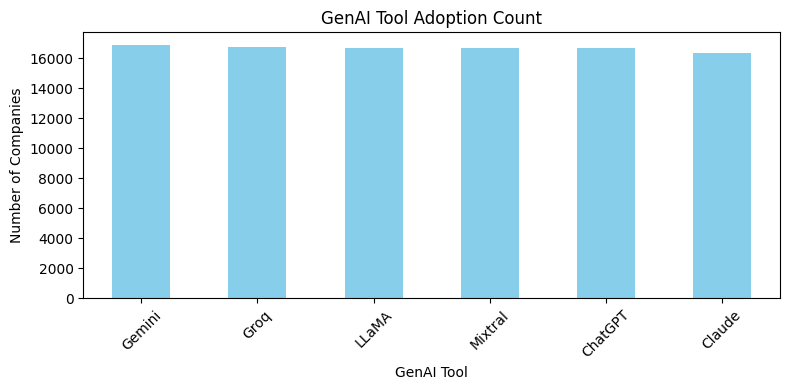

In [12]:
plt.figure(figsize=(8,4))
Ai['GenAI Tool'].value_counts().plot(kind='bar', color='skyblue')
plt.title('GenAI Tool Adoption Count')
plt.xlabel('GenAI Tool')
plt.ylabel('Number of Companies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Industry Distribution

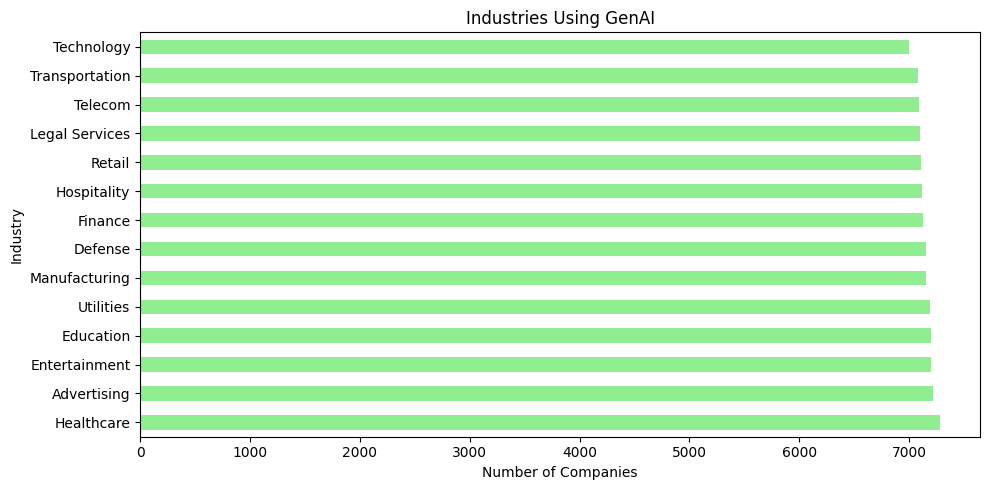

In [14]:
plt.figure(figsize=(10,5))
Ai['Industry'].value_counts().plot(kind='barh', color='lightgreen')
plt.title('Industries Using GenAI')
plt.xlabel('Number of Companies')
plt.tight_layout()
plt.show()

Adoption Year Trend

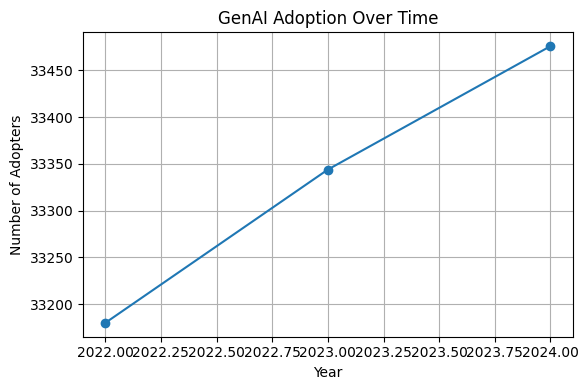

In [17]:
plt.figure(figsize=(6,4))
Ai['Adoption Year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('GenAI Adoption Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Adopters')
plt.grid(True)
plt.tight_layout()
plt.show()

Productivity Change by Industry

/tmp/ipython-input-162506577.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Ai, x='Industry', y='Productivity Change (%)', estimator='mean', ci=None)


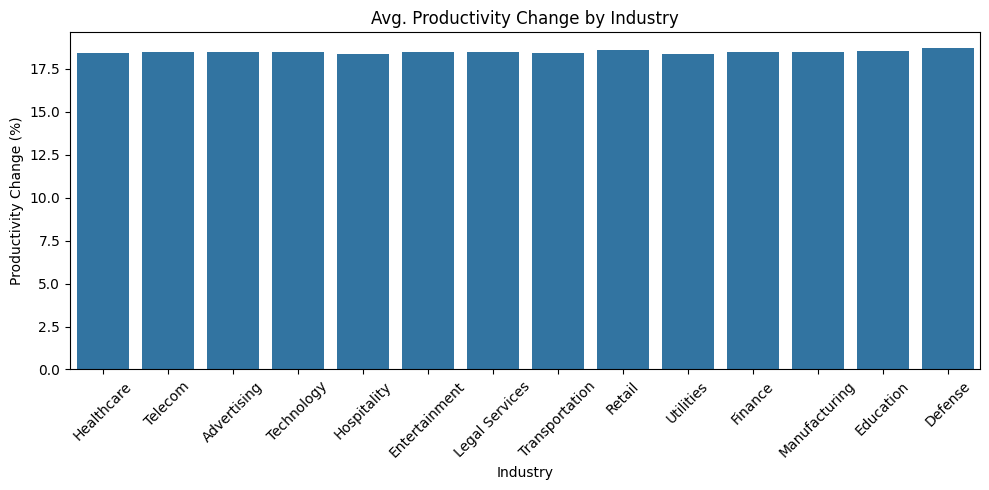

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(data=Ai, x='Industry', y='Productivity Change (%)', estimator='mean', ci=None)
plt.title('Avg. Productivity Change by Industry')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Training Hours vs Productivity

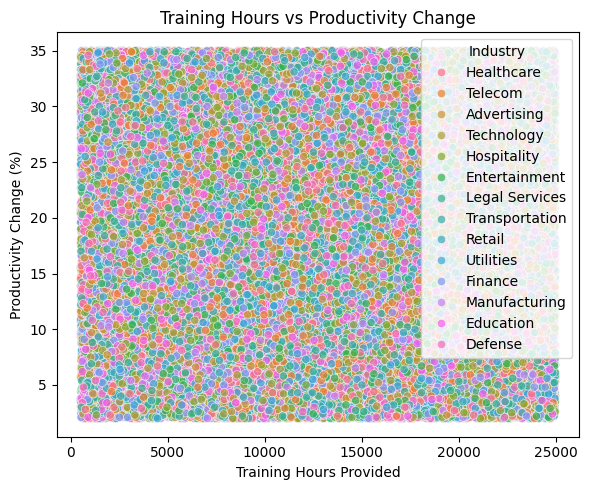

In [28]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='Training Hours Provided', y='Productivity Change (%)', hue='Industry', data=Ai, alpha=0.7)
plt.title('Training Hours vs Productivity Change')
plt.tight_layout()
plt.show()

Correlation Heatmap

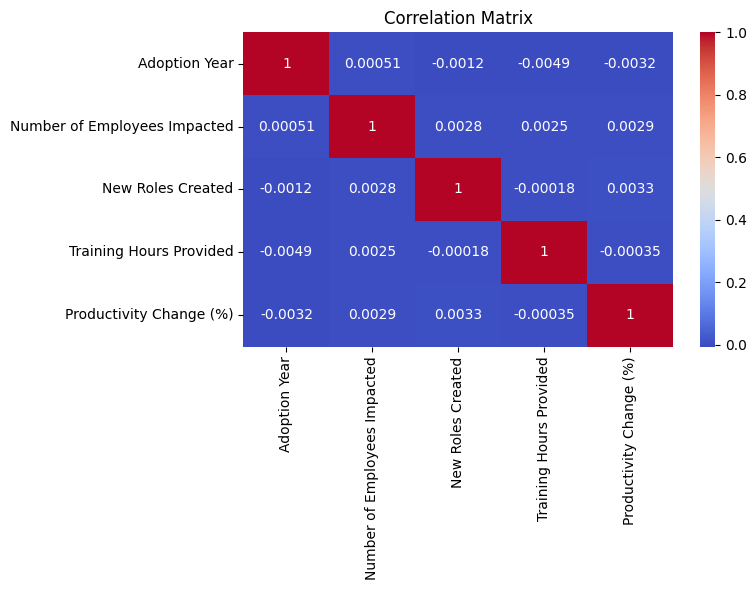

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(Ai.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

 Word Cloud from Employee Sentiment

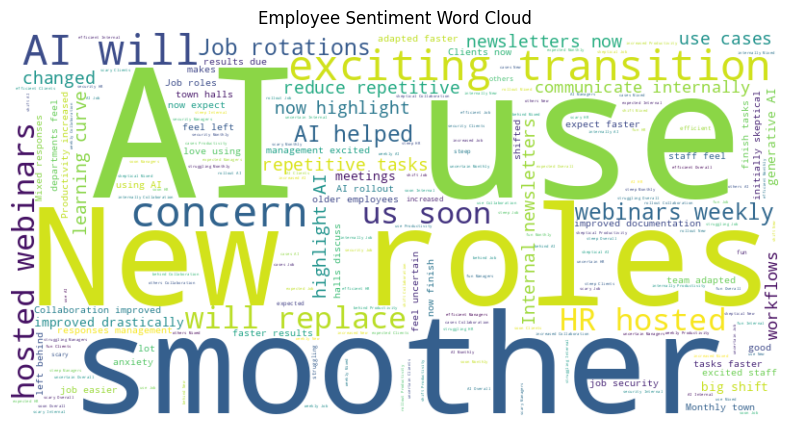

In [31]:
text = ' '.join(Ai['Employee Sentiment'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Employee Sentiment Word Cloud')
plt.show()

###Insights
####Example :
####GenAI adoption peaked in 2023.
#### Top industries: Technology, Healthcare, Finance.
####Higher training hours are generally correlated with better productivity.
#####Sentiment indicates mixed feelings: increased efficiency but job uncertainty.
